
### IMDB Dense in TF

FileName imdb_dense_tf.ipynb

Most recent date tested: 7/27/2024
Linux Ubuntu 22.04.4 LTS
Python 3.12.3

tf.__version__          2.18.0
keras.__version__       3.7
np.__version__          1.26.4

nvidia-smi returns the following info:
driver = 560.35.03
CUDA  = 12.6

GPU  = Nvidia GeForce 3060
CUDA cores = 3584
Memory = 12288 MB => 12GB
Memory interface = 192 bits

The code ran well under the new TF 2.18. The max temp in the GPU unit was 39 deg c

This notebook was originally written as a .py file to test tf/keras and CUDA in 3/2023.
I wrote it again in .ipynb to test the new versions of TF and Keras, and to test the use
of the local IMDB data I obtained from

https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


The code here follows the imbd classification code presented by Chollet's tf kr  2nd ed book
starting in pp. 97.

after 20 epochs the metrics are

            TEST                        VALIDATION
    loss: 0.0051 - acc: 0.9993 - val_loss: 0.7089 - val_acc: 0.8662

after 5 epochs the metrics are

            TEST                        VALIDATION
    loss: 0.1486 - acc: 0.9522 - val_loss: 0.2806 - val_acc: 0.8876





In [ ]:

from logging import logProcesses
import os, shutil
from platform import python_branch
from syslog import LOG_SYSLOG

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras.layers import Dropout
from keras.datasets import mnist

print ("TF Version   ", tf.__version__)
print ("TF Path      ", tf.__path__[0])
print("Keras version ", keras.__version__)
print("numpy version ", np.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

TF Version    2.18.0
TF Path       /drv3/hm3/code/python/tf2.18/tf2.18/lib/python3.12/site-packages/keras/api/_v2
Keras version  3.7.0
numpy version  1.26.4
Num GPUs Available:  1


In [ ]:

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate (sequences):
        results[i, sequence] = 1.
    return results

def print_review( item ) :
  for i in item :
    print (i)


In [ ]:
# Get the data from tf/keras. Maybe I need to test the local data to ensure it is a bona fide version
imdb = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

print (train_data[0] )


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
# Use the IMDB Data located at /drv3/hm3/Data/IMDB/aclImdb/.. where I have subdirs for /test/train/val
# the documentation of the function ...imdb.load_data() is at this link:

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data



In [ ]:

x_train = vectorize_sequences (train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')


# create a model witl 16 units, compiule, train, plot
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



/drv3/hm3/code/python/tf2.18/tf2.18/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print("Model Summary")
print(model.summary())

Model Summary


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
## change from 20 to 5 epochs and display

# Had to reduce batch_size to 256 to avoid crash
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - acc: 0.7042 - loss: 0.5998 - val_acc: 0.8657 - val_loss: 0.4056
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.8914 - loss: 0.3518 - val_acc: 0.8809 - val_loss: 0.3202
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9226 - loss: 0.2525 - val_acc: 0.8859 - val_loss: 0.2926
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9385 - loss: 0.1971 - val_acc: 0.8861 - val_loss: 0.2855
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - acc: 0.9476 - loss: 0.1676 - val_acc: 0.8831 - val_loss: 0.2864
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9557 - loss: 0.1412 - val_acc: 0.8856 - val_loss: 0.2867
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9668 - loss: 0.1149 - val_acc: 0.8670 - val_loss: 0.3470
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9683 - loss: 0.1075 - val_acc: 0.8839 - val_loss: 0.3058
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9787

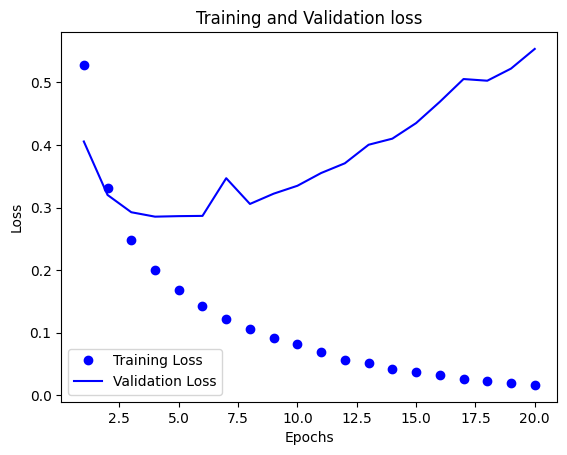

In [ ]:

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

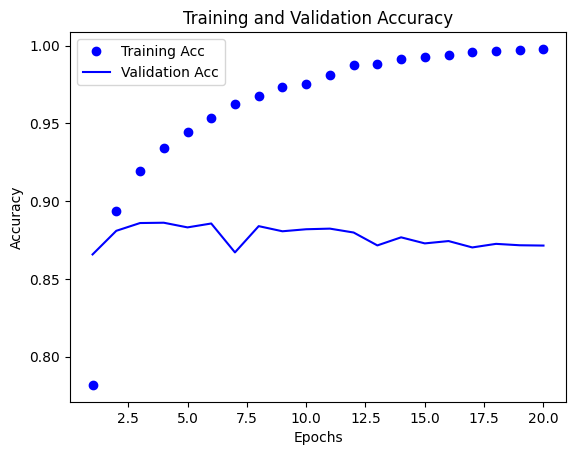

Done


In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc,'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print ("Done")


Modelo con 8 parametros

In [ ]:
# # create a model witl 8 units, compiule, train, plot
model_8 = tf.keras.models.Sequential()
model_8.add(tf.keras.layers.Dense(8, activation='relu', input_shape=(10000,)))
model_8.add(tf.keras.layers.Dense(8, activation='relu'))
model_8.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_8.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model_8.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - acc: 0.6933 - loss: 0.6128 - val_acc: 0.8526 - val_loss: 0.4408
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.8872 - loss: 0.3822 - val_acc: 0.8702 - val_loss: 0.3565
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9132 - loss: 0.2831 - val_acc: 0.8847 - val_loss: 0.3021
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9299 - loss: 0.2292 - val_acc: 0.8892 - val_loss: 0.2826
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9431 - loss: 0.1889 - val_acc: 0.8911 - val_loss: 0.2749
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - acc: 0.9543 - loss: 0.1566 - val_acc: 0.8877 - val_loss: 0.2766
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9586 - loss: 0.1398 - val_acc: 0.8868 - val_loss: 0.2790
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9667 - loss: 0.1216 - val_acc: 0.8825 - val_loss: 0.2916
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - acc: 0.9713

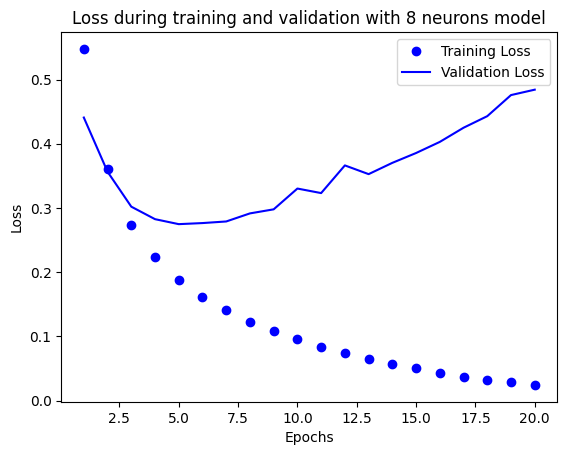

In [ ]:

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Loss during training and validation with 8 neurons model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

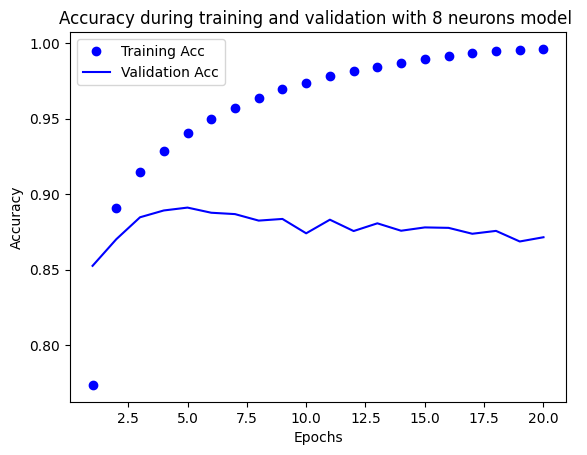

Done


In [ ]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc,'b', label='Validation Acc')
plt.title('Accuracy during training and validation with 8 neurons model ')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print ("Done")

Ejercicio con pytorch

In [ ]:
import keras
# Get the data from tf/keras. Maybe I need to test the local data to ensure it is a bona fide version
imdb = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)
print (train_data[0] )

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate (sequences):
        results[i, sequence] = 1.
    return results

def print_review( item ) :
  for i in item :
    print (i)


x_train = vectorize_sequences (train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')


import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# --- Supongamos que ya tienes definidos:

# Convertir a tensores de PyTorch (si no lo has hecho ya)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
x_test_tensor  = torch.tensor(x_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # (N, 1)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Crear conjuntos de validación y de entrenamiento parcial
x_val = x_train_tensor[:10000]
partial_x_train = x_train_tensor[10000:]
y_val = y_train_tensor[:10000]
partial_y_train = y_train_tensor[10000:]

# Crear un DataLoader para el conjunto de entrenamiento parcial
batch_size = 512
train_dataset = TensorDataset(partial_x_train, partial_y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Definir el modelo (igual que ya j tienes)
model_torch = nn.Sequential(
    nn.Linear(10000, 16),
    nn.ReLU(),
    nn.Linear(16, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

# Configurar el optimizador y la función de pérdida
optimizer = optim.RMSprop(model_torch.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Ciclo de entrenamiento
num_epochs = 20

# Para almacenar la historia de pérdidas (similar a history_torch.history_torch en Keras)
history_torch = {
    'loss': [],
    'val_loss': [],
    'acc': [],
    'val_acc': []
}

for epoch in range(num_epochs):
    model_torch.train()  # Modo entrenamiento
    running_loss = 0.0
    train_correct = 0
    train_total = 0

    # Bucle sobre los batches del DataLoader
    for batch_inputs, batch_labels in train_loader:
        optimizer.zero_grad()            # Reiniciar gradientes
        outputs = model_torch(batch_inputs)      # Forward pass
        loss = criterion(outputs, batch_labels)  # Calcular pérdida
        loss.backward()                    # Backward pass
        optimizer.step()                   # Actualizar parámetros

        running_loss += loss.item() * batch_inputs.size(0)

    # Pérdida promedio en el conjunto de entrenamiento parcial
    epoch_loss = running_loss / len(train_dataset)
    history_torch['loss'].append(epoch_loss)

    # Calcular  accuracy del training para este batch
    predictions = (outputs > 0.5).float()  # Threshold predictions at 0.5
    train_correct += (predictions == batch_labels).sum().item()
    train_total += batch_labels.size(0)

    epoch_acc = train_correct / train_total
    history_torch['acc'].append(epoch_acc)

    # Validación: se desactiva el cálculo de gradientes
    model_torch.eval()  # Modo evaluación
    with torch.no_grad():
        val_outputs = model_torch(x_val)
        val_loss = criterion(val_outputs, y_val).item()
    # Compute validation accuracy
        val_predictions = (val_outputs > 0.5).float()
        val_correct = (val_predictions == y_val).sum().item()
        val_acc = val_correct / y_val.size(0)

    history_torch['val_loss'].append(val_loss)
    history_torch['val_acc'].append(val_acc)

    print(f"Epoch {epoch+1}/{num_epochs} - loss: {epoch_loss:.4f} - acc: {epoch_acc:.4f} - val_loss: {val_loss:.4f} - val_acc: {val_acc:.4f}")


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Epoch 1/20 - loss: 0.5096 - acc: 0.8882 - val_loss: 0.3689 -

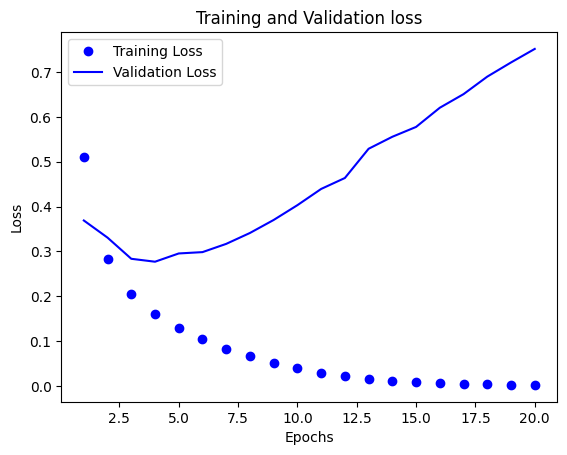

In [ ]:
loss_values = history_torch['loss']
val_loss_values = history_torch['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

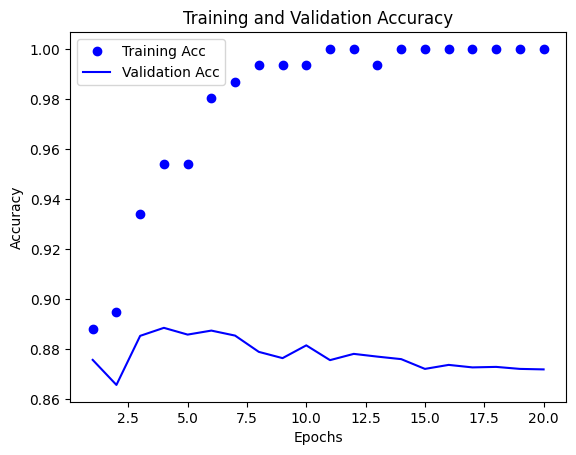

Done


In [ ]:
plt.clf()
acc = history_torch['acc']
val_acc = history_torch['val_acc']

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc,'b', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print ("Done")
